In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# Load the .mat file
data = loadmat('salinas_corrected.mat')['salinas_corrected']
gt = loadmat('salinas_gt.mat')['salinas_gt']
data = data.reshape((data.shape[0], data.shape[1]* data.shape[2]))
data = data / np.max(data)
print(data)
print(data.shape)

[[ 0.03149777  0.04138156  0.06353861 ...  0.00010861  0.00010861
  -0.00032584]
 [ 0.04116433  0.0434452   0.06516781 ...  0.00010861  0.00010861
  -0.00032584]
 [ 0.0400782   0.05376344  0.06560226 ...  0.00065168  0.00010861
   0.00043445]
 ...
 [ 0.04116433  0.04159878  0.05865103 ...  0.00445313  0.00141197
   0.00293255]
 [ 0.03410449  0.05202563  0.06560226 ...  0.00456175  0.0016292
   0.0024981 ]
 [ 0.04029543  0.0434452   0.06571087 ...  0.00456175  0.0016292
   0.0024981 ]]
(512, 44268)


In [3]:
class kmeansClustering:
    
    def __init__ (self, k=5):
        self.k = k
        self.centroids = None

    def clustering_error(self, X, y):
        total_sum_of_squares = np.sum((X - np.mean(X, axis=0))**2)
        error = 0
        for i in range(self.k):
            cluster_points = X[y == i]
            if len(cluster_points) > 0:
                centroid = self.centroids[i]
                error += np.sum((cluster_points - centroid)**2)
        return error / total_sum_of_squares
    
    def elbow_method(self, X, max_k):
        errors = []
        for k in range(1, max_k+1):
            self.k = k
            y = self.fit(X)
            error = self.clustering_error(X, y)
            errors.append(error)
            
        plt.plot(range(1, max_k+1), errors, 'bx-')
        plt.xlabel('k')
        plt.ylabel('SSE')
        plt.title('The Elbow Method showing the optimal k')
        plt.show()
        
    
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2 , axis=1))

    
    
    def fit(self, X, max_iterations=2000):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iterations):
            
            y = []; #cluster labels
            # do i need z?
            
            for data_point in X:
                distances = kmeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances) #centroid has the smallest distance to the data point
                y.append(cluster_num)
            
            y = np.array(y)
            
            cluster_indices = []
            
            for i in range(self.k): 
                cluster_indices.append(np.argwhere(y==i)) 
                
            cluster_centers = []
            
            # Update the centroids
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0: #if there are no data points in the cluster
                    cluster_centers.append(self.centroids[i]) #keep the current centroid
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0]) #update the centroid 
            
            if np.max(self.centroids - np.array(cluster_centers)) < 0.00001:
                break
            else: 
                self.centroids = np.array(cluster_centers)
                
        return y
        

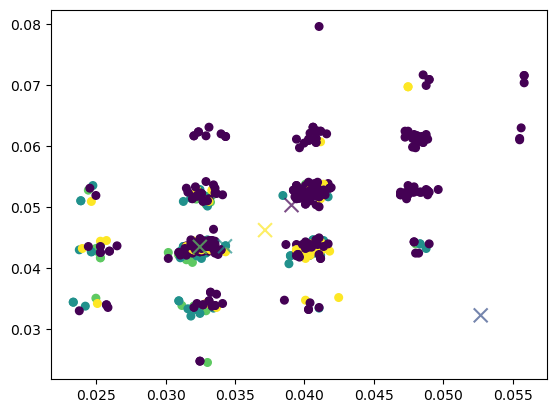

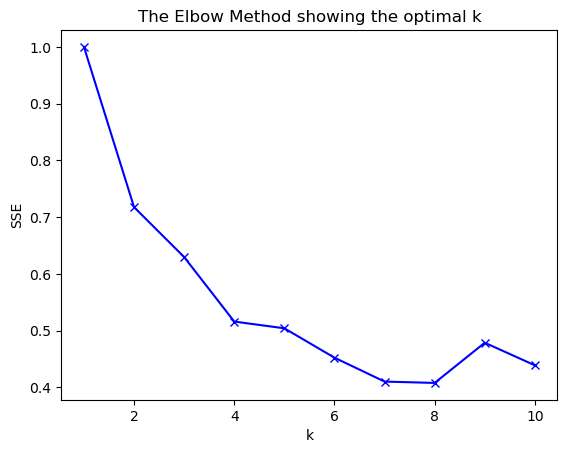

In [4]:
kmeans = kmeansClustering(k=5)
labels = kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')
# plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')
centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c=range(len(kmeans.centroids)),marker='x', s=100, alpha=0.7);
plt.show()

kmeans.elbow_method(data, max_k=10)

Optimal k value according to elbow method is: 8


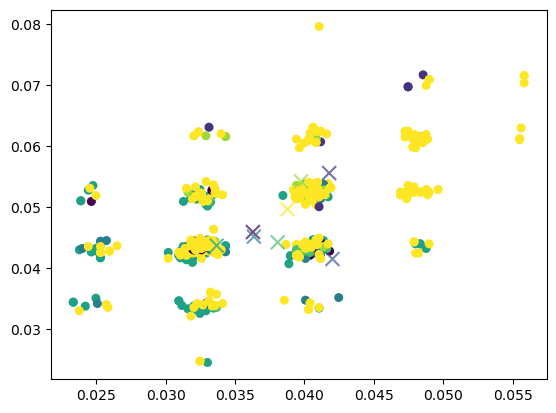

In [5]:
print('Optimal k value according to elbow method is: 8')
optimal_k = 8
kmeans = kmeansClustering(optimal_k)
labels = kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=30, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c=range(len(kmeans.centroids)),marker='x', s=100, alpha=0.7);

plt.show()

In [6]:
# Error
error = kmeans.clustering_error(data, labels)
print('Clustering Error:', error)

Clustering Error: 0.44925578470520267


[[ 0.03149777  0.04138156  0.06353861 ...  0.00010861  0.00010861
  -0.00032584]
 [ 0.04116433  0.0434452   0.06516781 ...  0.00010861  0.00010861
  -0.00032584]
 [ 0.0400782   0.05376344  0.06560226 ...  0.00065168  0.00010861
   0.00043445]
 ...
 [ 0.04116433  0.04159878  0.05865103 ...  0.00445313  0.00141197
   0.00293255]
 [ 0.03410449  0.05202563  0.06560226 ...  0.00456175  0.0016292
   0.0024981 ]
 [ 0.04029543  0.0434452   0.06571087 ...  0.00456175  0.0016292
   0.0024981 ]]
(512, 44268)


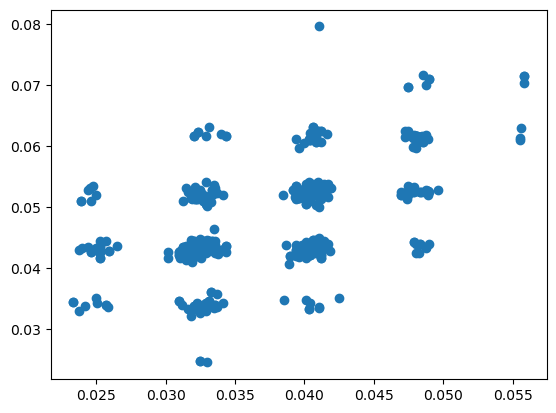

C:\Users\hghar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


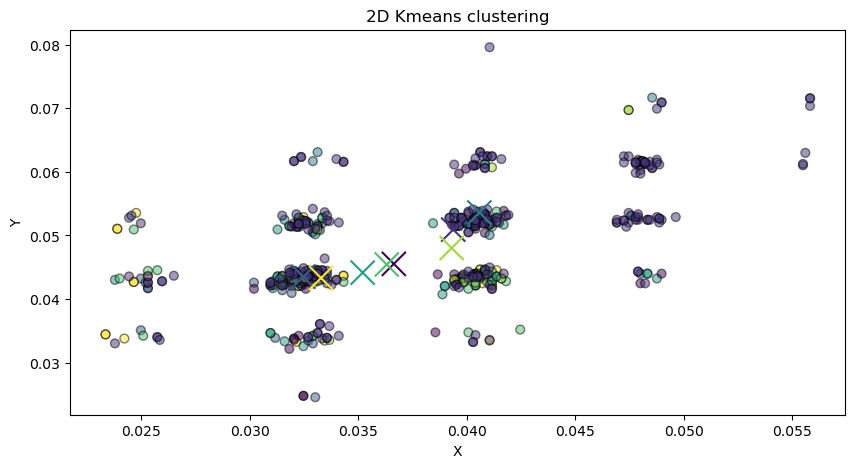

In [7]:
#Sklearn results

from sklearn.cluster import KMeans

print(data)
print(data.shape)
plt.scatter(data[:,0], data[:,1])
plt.show()

kmeans = KMeans(n_clusters=8, n_init='auto')
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# plot clusters and centroids
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(data[:,0],data[:,1], c=y_kmeans, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(centers[:,0], centers[:,1],
           s = 300, c = range(len(centers)), marker='x', label = 'Centroid')
ax.set_title("2D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
plt.show()

